Data Cleaning and Preprocessing
Check for missing values and handle them
Convert categorical features to numerical (if applicable)
Standardize or normalize features if required

In [63]:
import pandas as pd

# Load the dataset
data = pd.read_csv("forestfires.csv")


# Verify that the data is loaded
print(data.head())

   X  Y month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area
0  7  5   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0
1  7  4   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0
2  7  4   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0
3  8  6   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0
4  8  6   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0


In [64]:
# Display basic information about the dataset
print(data.info())
print(data.describe())
print(data.head())
print(data.columns)  # Print all column names


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB
None
                X           Y        FFMC         DMC          DC         ISI  \
count  517.000000  517.000000  517.000000  517.000000  517.000000  517.000000   
mean     4.669246    4.299807   90.644681  110.872340  547.940039    9.021663   
std      2.313778    1.229900

In [65]:
# Check for missing values
print(data.isnull().sum())

# Convert categorical columns to numerical (if needed)
data = pd.get_dummies(data)

# Standardize features (if necessary)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)


X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64


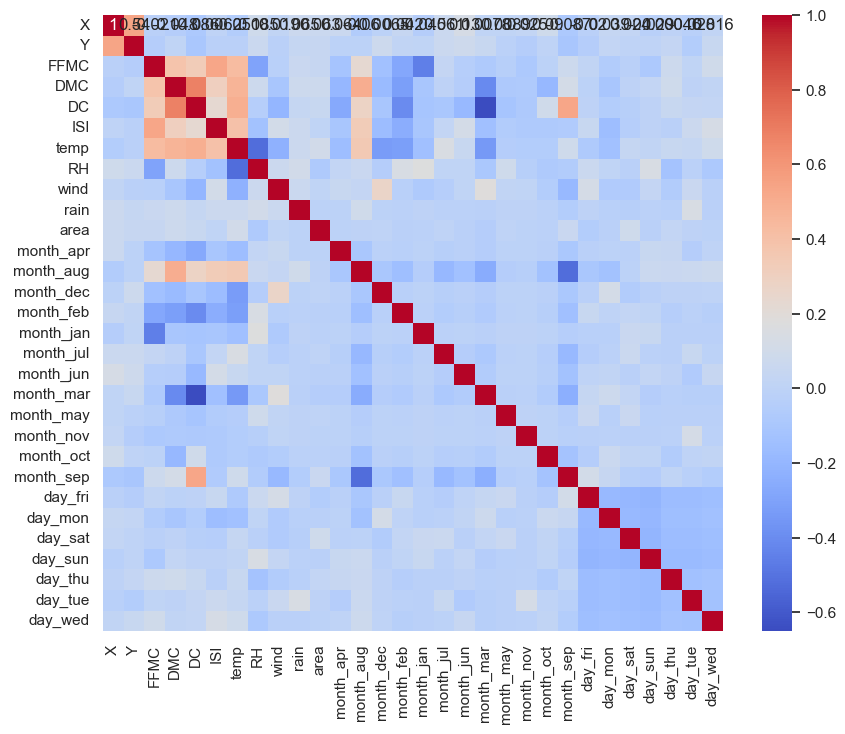

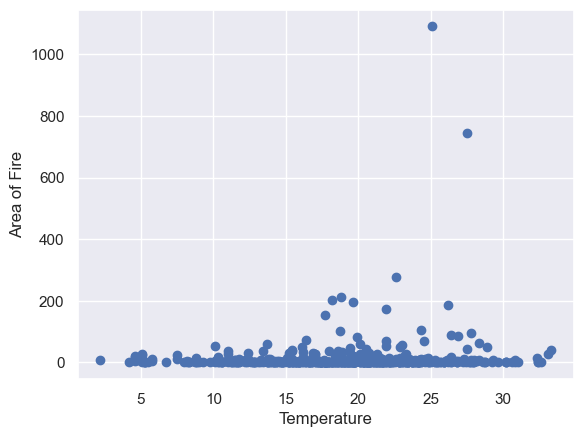

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()

# Example: Scatter plot for temperature vs fire area
plt.scatter(data['temp'], data['area'])
plt.xlabel('Temperature')
plt.ylabel('Area of Fire')
plt.show()


In [67]:
if 'Classes' in data.columns:
    data['Classes'] = data['Classes'].str.strip()
else:
    print("The column 'Classes' does not exist.")

The column 'Classes' does not exist.


In [68]:
X = data.drop('area', axis=1)  # Features
y = data['area']               # Target (area affected by fire)

# Optional: Use Feature Importance or PCA
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X, y)

# Get feature importances
feature_importances = model.feature_importances_
print(feature_importances)


[3.85634503e-02 5.69864737e-02 3.98352169e-02 1.27373378e-01
 3.89038685e-02 3.55510747e-02 4.15225235e-01 7.56595074e-02
 6.81502253e-02 1.09570930e-05 2.19340817e-04 2.22065826e-03
 1.14751125e-04 4.73780831e-04 6.34624474e-07 8.24962034e-03
 3.14276154e-04 4.00731617e-03 7.62535610e-04 5.11360560e-07
 9.63943292e-04 1.41814141e-02 9.44892670e-04 6.97536286e-03
 1.80605846e-02 9.44890295e-03 2.77967951e-02 4.48687189e-03
 4.51842078e-03]


In [69]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [70]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Make predictions
y_pred = regressor.predict(X_test)


In [71]:
from sklearn.ensemble import RandomForestRegressor

# Train the regression model
regressor = RandomForestRegressor()
regressor.fit(X_train, y_train)

# Make predictions
y_pred = regressor.predict(X_test)

# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse}, R2 Score: {r2}')


MSE: 11952.609997554384, R2 Score: -0.013984662665927683


In [72]:
# Convert continuous 'area' to binary labels: Fire (1) or No Fire (0)
y_train_binary = (y_train > 0).astype(int)
y_test_binary = (y_test > 0).astype(int)

from sklearn.ensemble import RandomForestClassifier

# Train the classifier
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train_binary)

# Predict on the test set
y_pred_class = classifier.predict(X_test)

# Evaluate the classification model
from sklearn.metrics import accuracy_score, classification_report
print(f'Accuracy: {accuracy_score(y_test_binary, y_pred_class)}')
print(classification_report(y_test_binary, y_pred_class))


Accuracy: 0.5576923076923077
              precision    recall  f1-score   support

           0       0.55      0.53      0.54        51
           1       0.56      0.58      0.57        53

    accuracy                           0.56       104
   macro avg       0.56      0.56      0.56       104
weighted avg       0.56      0.56      0.56       104



In [73]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse}, MAE: {mae}, R2: {r2}')


MSE: 11952.609997554384, MAE: 26.596310505952374, R2: -0.013984662665927683


In [74]:
# Ensure y_test is binary (0: No Fire, 1: Fire)
y_test_binary = (y_test > 0).astype(int)


In [75]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate metrics using the binary y_test
accuracy = accuracy_score(y_test_binary, y_pred_class)
precision = precision_score(y_test_binary, y_pred_class)
recall = recall_score(y_test_binary, y_pred_class)
f1 = f1_score(y_test_binary, y_pred_class)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')


Accuracy: 0.5576923076923077
Precision: 0.5636363636363636
Recall: 0.5849056603773585
F1 Score: 0.5740740740740741


In [76]:
from sklearn.model_selection import GridSearchCV

params = {'n_estimators': [50, 100, 200]}
grid = GridSearchCV(RandomForestRegressor(), param_grid=params, cv=5)
grid.fit(X_train, y_train)

print(grid.best_params_)


{'n_estimators': 100}


In [77]:
import joblib

# Save the model
joblib.dump(regressor, 'forest_fire_model.pkl')


['forest_fire_model.pkl']

In [78]:
# Use the correct column name
data.columns = data.columns.str.strip()  # Clean any extra spaces in column names

if 'Classes' in data.columns:
    data['Classes'] = data['Classes'].str.strip()
else:
    print("The column 'Classes' does not exist.")


The column 'Classes' does not exist.


In [79]:
print(data.columns)  # Check for spelling or spaces


Index(['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain',
       'area', 'month_apr', 'month_aug', 'month_dec', 'month_feb', 'month_jan',
       'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov',
       'month_oct', 'month_sep', 'day_fri', 'day_mon', 'day_sat', 'day_sun',
       'day_thu', 'day_tue', 'day_wed'],
      dtype='object')


In [80]:
data.columns = data.columns.str.strip()  # Clean column names
print(data.columns)  # Verify again


Index(['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain',
       'area', 'month_apr', 'month_aug', 'month_dec', 'month_feb', 'month_jan',
       'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov',
       'month_oct', 'month_sep', 'day_fri', 'day_mon', 'day_sat', 'day_sun',
       'day_thu', 'day_tue', 'day_wed'],
      dtype='object')


In [81]:
if 'Classes' in data.columns:
    data['Classes'] = data['Classes'].astype(str).str.strip()
else:
    print("The column 'Classes' does not exist.")


The column 'Classes' does not exist.


In [82]:
print(data.head())  # Inspect the data


   X  Y  FFMC   DMC     DC  ISI  temp  RH  wind  rain  ...  month_nov  \
0  7  5  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0  ...      False   
1  7  4  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0  ...      False   
2  7  4  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0  ...      False   
3  8  6  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2  ...      False   
4  8  6  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0  ...      False   

   month_oct  month_sep  day_fri  day_mon  day_sat  day_sun  day_thu  day_tue  \
0      False      False     True    False    False    False    False    False   
1       True      False    False    False    False    False    False     True   
2       True      False    False    False     True    False    False    False   
3      False      False     True    False    False    False    False    False   
4      False      False    False    False    False     True    False    False   

   day_wed  
0    False  
1    False  
2    False  
3    False  
4    Fals

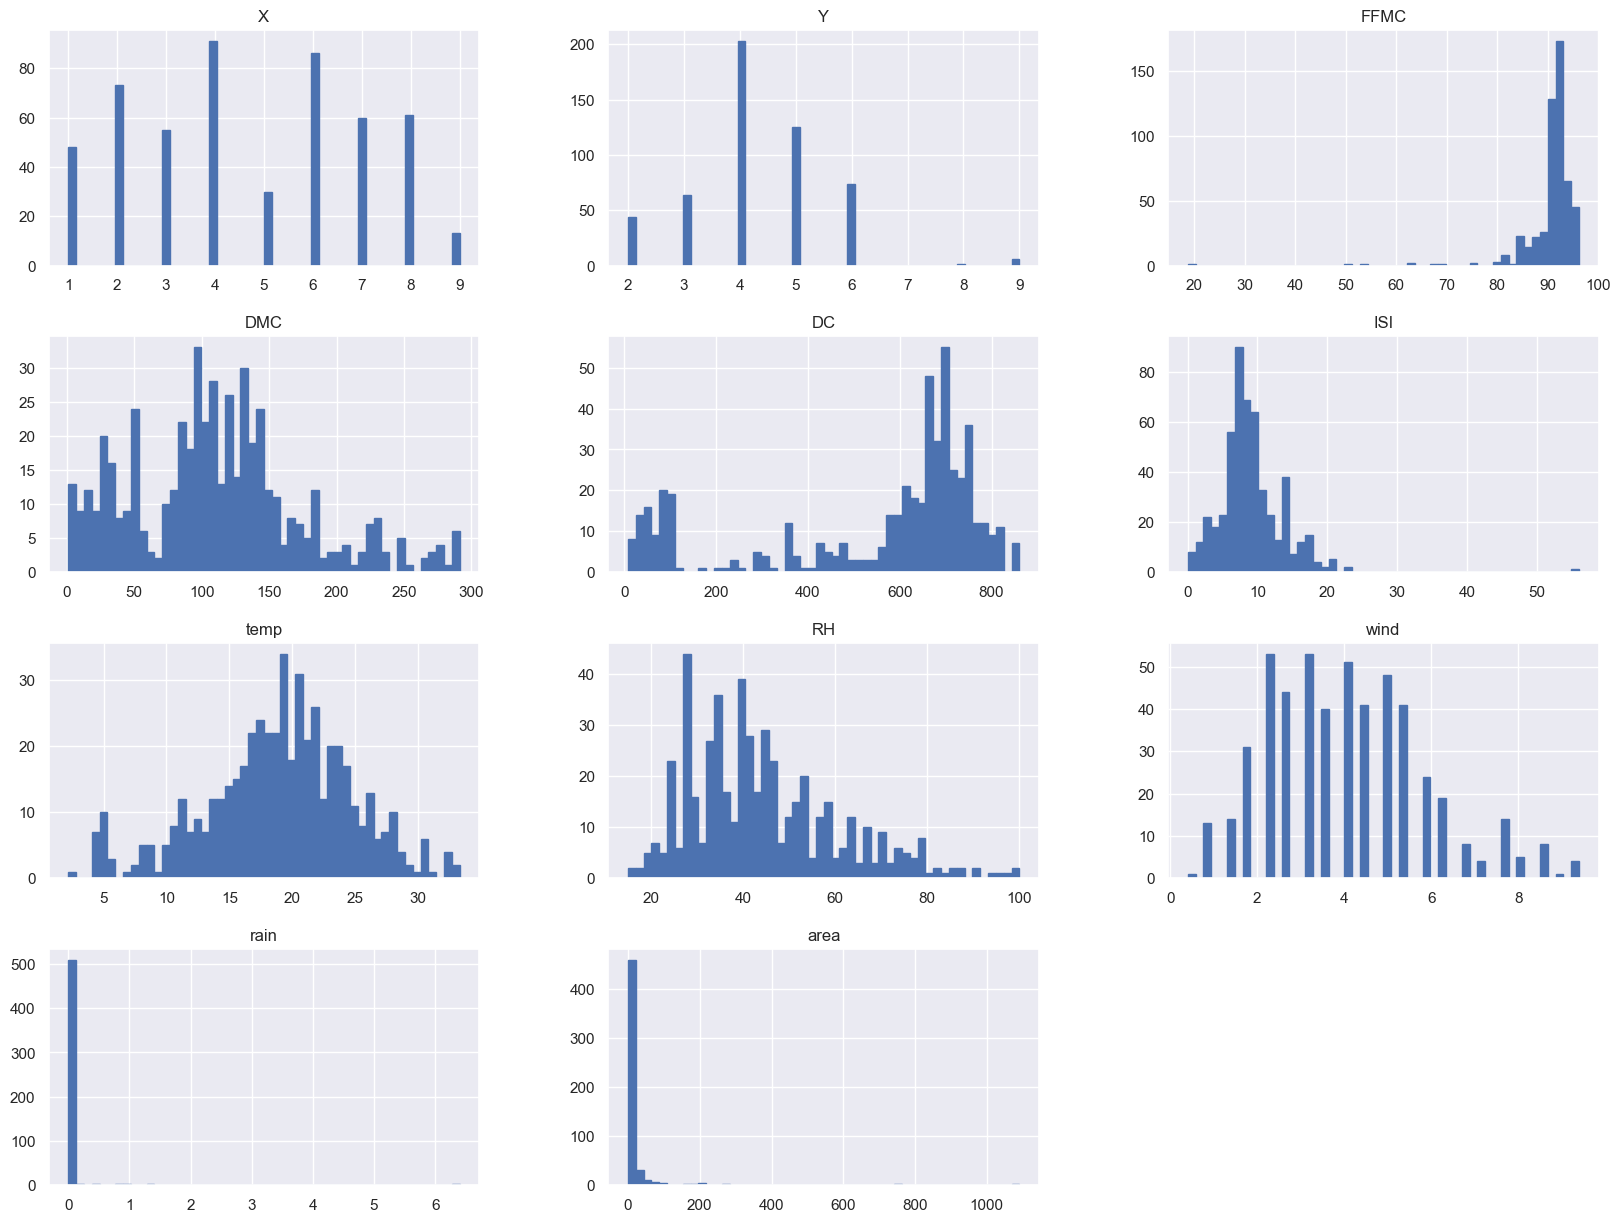

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()  # Apply Seaborn's default theme
data.hist(bins=50, figsize=(20, 15), ec='b')
plt.show()


In [84]:
print(data.head())
print(data.info())  # Check data types and find categorical columns


   X  Y  FFMC   DMC     DC  ISI  temp  RH  wind  rain  ...  month_nov  \
0  7  5  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0  ...      False   
1  7  4  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0  ...      False   
2  7  4  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0  ...      False   
3  8  6  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2  ...      False   
4  8  6  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0  ...      False   

   month_oct  month_sep  day_fri  day_mon  day_sat  day_sun  day_thu  day_tue  \
0      False      False     True    False    False    False    False    False   
1       True      False    False    False    False    False    False     True   
2       True      False    False    False     True    False    False    False   
3      False      False     True    False    False    False    False    False   
4      False      False    False    False    False     True    False    False   

   day_wed  
0    False  
1    False  
2    False  
3    False  
4    Fals

In [85]:
print(data.columns)  # Display column names


Index(['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain',
       'area', 'month_apr', 'month_aug', 'month_dec', 'month_feb', 'month_jan',
       'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov',
       'month_oct', 'month_sep', 'day_fri', 'day_mon', 'day_sat', 'day_sun',
       'day_thu', 'day_tue', 'day_wed'],
      dtype='object')


In [87]:
# Replace 'region' with a suitable categorical column from your data
percentage = data['month_apr'].value_counts(normalize=True) * 100
print(percentage)


month_apr
False    98.259188
True      1.740812
Name: proportion, dtype: float64


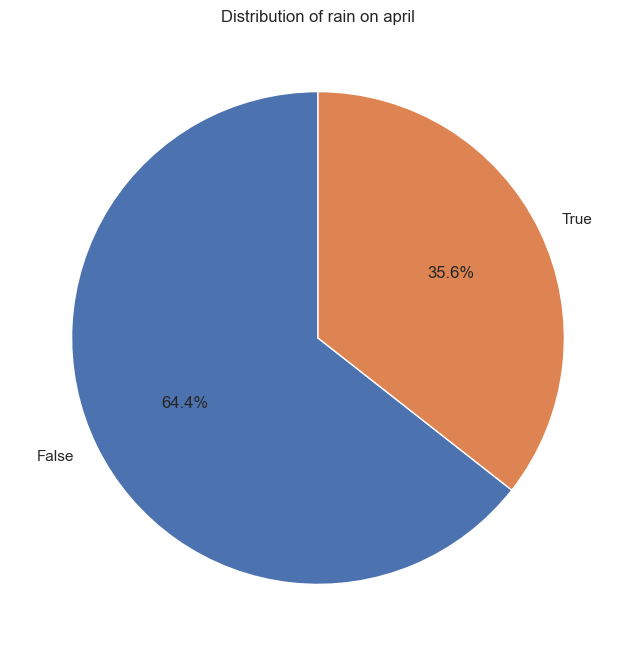

In [91]:
# Plot the pie chart
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
plt.pie(
    percentage, 
    labels=percentage.index, 
    autopct='%1.1f%%', 
    startangle=90
)
plt.title('Distribution of rain on april')
plt.show()

In [89]:
# Replace 'region' with a suitable categorical column from your data
percentage = data['month_aug'].value_counts(normalize=True) * 100
print(percentage)


month_aug
False    64.410058
True     35.589942
Name: proportion, dtype: float64


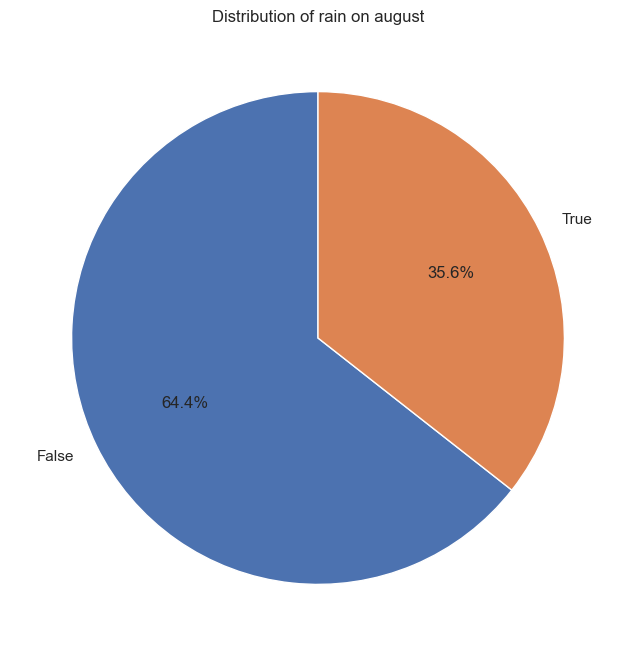

In [92]:
# Plot the pie chart
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
plt.pie(
    percentage, 
    labels=percentage.index, 
    autopct='%1.1f%%', 
    startangle=90
)
plt.title('Distribution of rain on august')
plt.show()

In [93]:
# Correlation chart
k = len(data.columns)
cols = corr.nlargest(k, 'Classes')['Classes'].index
cm = np.corrcoef(df1[cols].values.T)
sns.set(font_scale=1)
f, ax = plt.subplots(figsize=(20, 13))
hm = sns.heatmap(cm, annot=True, square=True, fmt='.2f', annot_kws={'size': 15}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

NameError: name 'corr' is not defined

In [95]:
import pandas as pd
import numpy as np
import seaborn as sns

# Assuming 'data' is your DataFrame
corr = data.corr()

# Now you can proceed with the rest of your code
k = len(data.columns)
cols = corr.nlargest(k, 'X')['X'].index
cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale=1)


AttributeError: 'float' object has no attribute 'shape'